In [1]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

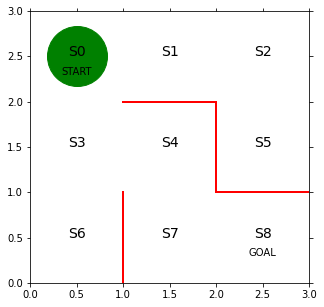

In [2]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [4]:
# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義


def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''

    beta = 1.0
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # thetaをexp(theta)へと変換

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # simpleに割合の計算の場合

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmaxで計算の場合

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

In [5]:
# 初期の方策pi_0を求める
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
# 行動aと1step移動後の状態sを求める関数を定義


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return [action, s_next]

In [7]:
# 迷路を解く関数の定義、状態と行動の履歴を出力


def goal_maze_ret_s_a(pi):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1）の行動を代入

        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return s_a_history

In [8]:
# 初期の方策で迷路を解く
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

[[0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 0], [0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 2], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 2], [3, 2], [6, 0], [3, 0], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 1], [4, 3], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]
迷路を解くのにかかったステップ数は50です


In [9]:
# thetaの更新関数を定義します


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # ゴールまでの総ステップ数

    [m, n] = theta.shape  # thetaの行列サイズを取得
    delta_theta = theta.copy()  # Δthetaの元を作成、ポインタ参照なので、delta_theta = thetaはダメ

    # delta_thetaを要素ごとに求めます
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # thetaがnanでない場合

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 履歴から状態iのものを取り出すリスト内包表記です

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 状態iで行動jをしたものを取り出す

                N_i = len(SA_i)  # 状態iで行動した総回数
                N_ij = len(SA_ij)  # 状態iで行動jをとった回数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [10]:
# 方策の更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.4995     0.5005     0.        ]
 [0.         0.4985     0.         0.5015    ]
 [0.         0.         0.4985     0.5015    ]
 [0.33399755 0.33133623 0.33466622 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.4995     0.5005     0.         0.        ]]


In [11]:
# 方策勾配法で迷路を解く

# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 10^-4よりも方策に変化が少なくなったら学習終了とする


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi)  # 方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta, pi, s_a_history)  # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 方策πの更新

    print(np.sum(np.abs(new_pi - pi)))  # 方策の変化を出力
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.006691530907815102
迷路を解くのにかかったステップ数は44です
0.014470519894438705
迷路を解くのにかかったステップ数は30です
0.01624016611786444
迷路を解くのにかかったステップ数は12です
0.013600636968934543
迷路を解くのにかかったステップ数は14です
0.010657982683136669
迷路を解くのにかかったステップ数は62です
0.004882032906578515
迷路を解くのにかかったステップ数は214です
0.004396467130368287
迷路を解くのにかかったステップ数は72です
0.015961695155766342
迷路を解くのにかかったステップ数は30です
0.009689156079228267
迷路を解くのにかかったステップ数は64です
0.019429793089459024
迷路を解くのにかかったステップ数は10です
0.011367586578389377
迷路を解くのにかかったステップ数は56です
0.012950208414598763
迷路を解くのにかかったステップ数は20です
0.02503695393693406
迷路を解くのにかかったステップ数は8です
0.03171841044536672
迷路を解くのにかかったステップ数は6です
0.010856875049317649
迷路を解くのにかかったステップ数は28です
0.021471622104283883
迷路を解くのにかかったステップ数は20です
0.02586204198562353
迷路を解くのにかかったステップ数は14です
0.012070826633933052
迷路を解くのにかかったステップ数は166です
0.03115886356327402
迷路を解くのにかかったステップ数は6です
0.01928778699512207
迷路を解くのにかかったステップ数は12です
0.011974257492536333
迷路を解くのにかかったステップ数は28です
0.028279911469985874
迷路を解くのにかかったステップ数は10です
0.011646158488817782
迷路を解くのにかかったステップ数は96です
0.0062514923071866

0.019345729119334354
迷路を解くのにかかったステップ数は6です
0.017705448959497272
迷路を解くのにかかったステップ数は4です
0.015160439260613667
迷路を解くのにかかったステップ数は12です
0.016171630118732377
迷路を解くのにかかったステップ数は6です
0.017499530468481045
迷路を解くのにかかったステップ数は4です
0.014457131225775216
迷路を解くのにかかったステップ数は6です
0.01886094823869458
迷路を解くのにかかったステップ数は6です
0.017068719798256277
迷路を解くのにかかったステップ数は4です
0.010643772225839676
迷路を解くのにかかったステップ数は12です
0.021497645537878196
迷路を解くのにかかったステップ数は12です
0.01381939874435087
迷路を解くのにかかったステップ数は14です
0.015985020687413698
迷路を解くのにかかったステップ数は8です
0.023309886445196493
迷路を解くのにかかったステップ数は14です
0.01907143764315808
迷路を解くのにかかったステップ数は18です
0.016107653967719043
迷路を解くのにかかったステップ数は14です
0.0172712825442832
迷路を解くのにかかったステップ数は4です
0.014287887625847928
迷路を解くのにかかったステップ数は6です
0.016926808856179948
迷路を解くのにかかったステップ数は4です
0.01668746816827471
迷路を解くのにかかったステップ数は4です
0.012334663195176121
迷路を解くのにかかったステップ数は6です
0.0150469266223352
迷路を解くのにかかったステップ数は24です
0.01658643647827121
迷路を解くのにかかったステップ数は4です
0.015474036958643439
迷路を解くのにかかったステップ数は8です
0.01220047436787347
迷路を解くのにかかったステップ

0.007073568991139478
迷路を解くのにかかったステップ数は6です
0.0061104905606548104
迷路を解くのにかかったステップ数は4です
0.006047746154498421
迷路を解くのにかかったステップ数は4です
0.0071739723616714435
迷路を解くのにかかったステップ数は6です
0.006992073702995122
迷路を解くのにかかったステップ数は6です
0.006051131864033263
迷路を解くのにかかったステップ数は4です
0.005989153277592557
迷路を解くのにかかったステップ数は4です
0.005928041481978313
迷路を解くのにかかったステップ数は4です
0.0058677822085095865
迷路を解くのにかかったステップ数は4です
0.005808361428596101
迷路を解くのにかかったステップ数は4です
0.011034862448069102
迷路を解くのにかかったステップ数は18です
0.005801142323747593
迷路を解くのにかかったステップ数は4です
0.006926150232883385
迷路を解くのにかかったステップ数は6です
0.010074396654770848
迷路を解くのにかかったステップ数は6です
0.009747611004907522
迷路を解くのにかかったステップ数は12です
0.0058568106552827764
迷路を解くのにかかったステップ数は4です
0.016388356612851804
迷路を解くのにかかったステップ数は26です
0.005795424325729062
迷路を解くのにかかったステップ数は4です
0.005737078330089712
迷路を解くのにかかったステップ数は4です
0.005679539081536067
迷路を解くのにかかったステップ数は4です
0.005622793304551163
迷路を解くのにかかったステップ数は4です
0.005566827952959416
迷路を解くのにかかったステップ数は4です
0.011539024407135737
迷路を解くのにかかったステップ数は16です
0.005610179082274375
迷路を解く

0.007356003182672745
迷路を解くのにかかったステップ数は8です
0.0028997137714709686
迷路を解くのにかかったステップ数は4です
0.0028776832614569037
迷路を解くのにかかったステップ数は4です
0.002855894316289208
迷路を解くのにかかったステップ数は4です
0.0028343435561436273
迷路を解くのにかかったステップ数は4です
0.005522691091502607
迷路を解くのにかかったステップ数は6です
0.0028446576281361477
迷路を解くのにかかったステップ数は4です
0.002823185861171265
迷路を解くのにかかったステップ数は4です
0.002801948275829448
迷路を解くのにかかったステップ数は4です
0.006121927717622676
迷路を解くのにかかったステップ数は6です
0.006187327316326464
迷路を解くのにかかったステップ数は6です
0.0028225917964359443
迷路を解くのにかかったステップ数は4です
0.0028013468838703343
迷路を解くのにかかったステップ数は4です
0.002780333260088849
迷路を解くのにかかったステップ数は4です
0.006242489243158247
迷路を解くのにかかったステップ数は6です
0.005494316116637109
迷路を解くのにかかったステップ数は6です
0.0027971575289693976
迷路を解くのにかかったステップ数は4です
0.006309220551444644
迷路を解くのにかかったステップ数は6です
0.0027839367373429305
迷路を解くのにかかったステップ数は4です
0.006173794368704369
迷路を解くのにかかったステップ数は6です
0.01184975584658416
迷路を解くのにかかったステップ数は8です
0.008093559878397001
迷路を解くのにかかったステップ数は8です
0.010435579474611628
迷路を解くのにかかったステップ数は12です
0.0105866964389294
迷路を解くのに

0.0018983382984291697
迷路を解くのにかかったステップ数は4です
0.001886458856346425
迷路を解くのにかかったステップ数は4です
0.0018746881092802994
迷路を解くのにかかったステップ数は4です
0.0018630247660629054
迷路を解くのにかかったステップ数は4です
0.0018514675541373357
迷路を解くのにかかったステップ数は4です
0.0018400152192487099
迷路を解くのにかかったステップ数は4です
0.0018286665251373638
迷路を解くのにかかったステップ数は4です
0.0018174202532404982
迷路を解くのにかかったステップ数は4です
0.006111879382994637
迷路を解くのにかかったステップ数は8です
0.004519181081978067
迷路を解くのにかかったステップ数は6です
0.0018540637650527603
迷路を解くのにかかったステップ数は4です
0.0046354368705851245
迷路を解くのにかかったステップ数は6です
0.001863932346532704
迷路を解くのにかかったステップ数は4です
0.0018523344652769738
迷路を解くのにかかったステップ数は4です
0.0018408422174236647
迷路を解くのにかかったステップ数は4です
0.0018294543531277019
迷路を解くのにかかったステップ数は4です
0.004870620319178717
迷路を解くのにかかったステップ数は6です
0.004538442967071711
迷路を解くのにかかったステップ数は6です
0.00185567835618905
迷路を解くのにかかったステップ数は4です
0.0018441370234426047
迷路を解くのにかかったステップ数は4です
0.0018327008183018079
迷路を解くのにかかったステップ数は4です
0.0018213684964420024
迷路を解くのにかかったステップ数は4です
0.0018101388314168756
迷路を解くのにかかったステップ数は4です
0.01010341430736800

0.0012462511439867152
迷路を解くのにかかったステップ数は4です
0.0012398020618177227
迷路を解くのにかかったステップ数は4です
0.0012334022532525246
迷路を解くのにかかったステップ数は4です
0.0012270512244635101
迷路を解くのにかかったステップ数は4です
0.0037276725673019914
迷路を解くのにかかったステップ数は6です
0.0012350374079210802
迷路を解くのにかかったステップ数は4です
0.0012286679783759732
迷路を解くのにかかったステップ数は4です
0.001222347061356023
迷路を解くのにかかったステップ数は4です
0.0012160741721845073
迷路を解くのにかかったステップ数は4です
0.0012098488321306416
迷路を解くのにかかったステップ数は4です
0.0012036705683273335
迷路を解くのにかかったステップ数は4です
0.0011975389136832104
迷路を解くのにかかったステップ数は4です
0.00403304381844858
迷路を解くのにかかったステップ数は6です
0.001205024381992617
迷路を解くのにかかったステップ数は4です
0.0011988766581278315
迷路を解くのにかかったステップ数は4です
0.001192775294071552
迷路を解くのにかかったステップ数は4です
0.0011867198308227328
迷路を解くのにかかったステップ数は4です
0.0011807098149698228
迷路を解くのにかかったステップ数は4です
0.0011747447986080461
迷路を解くのにかかったステップ数は4です
0.0011688243392601952
迷路を解くのにかかったステップ数は4です
0.004024665656625327
迷路を解くのにかかったステップ数は6です
0.001176987176853328
迷路を解くのにかかったステップ数は4です
0.0011710415529926702
迷路を解くのにかかったステップ数は4です
0.0011651403738143

0.0008480545219546887
迷路を解くのにかかったステップ数は4です
0.0008443100012457926
迷路を解くのにかかったステップ数は4です
0.000840590303027227
迷路を解くのにかかったステップ数は4です
0.0008368952083163753
迷路を解くのにかかったステップ数は4です
0.0008332245005354885
迷路を解くのにかかったステップ数は4です
0.0008295779654785319
迷路を解くのにかかったステップ数は4です
0.0008259553912838592
迷路を解くのにかかったステップ数は4です
0.0008223565683985849
迷路を解くのにかかったステップ数は4です
0.00822044571572041
迷路を解くのにかかったステップ数は6です
0.0008216006208128027
迷路を解くのにかかったステップ数は4です
0.0008180425146259614
迷路を解くのにかかったステップ数は4です
0.0008145075295871336
迷路を解くのにかかったステップ数は4です
0.0008109954657283674
迷路を解くのにかかったステップ数は4です
0.0008075061252363208
迷路を解くのにかかったステップ数は4です
0.000804039312422785
迷路を解くのにかかったステップ数は4です
0.0008005948336968285
迷路を解くのにかかったステップ数は4です
0.0034868001687175625
迷路を解くのにかかったステップ数は6です
0.000810426373324763
迷路を解くのにかかったステップ数は4です
0.00080692741240624
迷路を解くのにかかったステップ数は4です
0.0008034511702797106
迷路を解くのにかかったステップ数は4です
0.0007999974502047313
迷路を解くのにかかったステップ数は4です
0.0007965660575634803
迷路を解くのにかかったステップ数は4です
0.0007931567998373558
迷路を解くのにかかったステップ数は4です
0.0007897694865787

0.00256154007186922
迷路を解くのにかかったステップ数は6です
0.0025849386633688028
迷路を解くのにかかったステップ数は6です
0.0006142556904385338
迷路を解くのにかかったステップ数は4です
0.002634482193794918
迷路を解くのにかかったステップ数は6です
0.000617508199637299
迷路を解くのにかかったステップ数は4です
0.0006151598576570293
迷路を解くのにかかったステップ数は4です
0.0006128249731553216
迷路を解くのにかかったステップ数は4です
0.0006105034431216488
迷路を解くのにかかったステップ数は4です
0.0025816923342888987
迷路を解くのにかかったステップ数は6です
0.0006157381992688872
迷路を解くのにかかったステップ数は4です
0.0006134011505937662
迷路を解くのにかかったステップ数は4です
0.0006110774567387282
迷路を解くのにかかったステップ数は4です
0.0006087670158774344
迷路を解くのにかかったステップ数は4です
0.0006064697271524165
迷路を解くのにかかったステップ数は4です
0.0006041854906641449
迷路を解くのにかかったステップ数は4です
0.0006019142074611752
迷路を解くのにかかったステップ数は4です
0.0026474672455041523
迷路を解くのにかかったステップ数は6です
0.0006079399451594976
迷路を解くのにかかったステップ数は4です
0.000605647522917991
迷路を解くのにかかったステップ数は4です
0.0006033681063107275
迷路を解くのにかかったステップ数は4です
0.0006011015969731269
迷路を解くのにかかったステップ数は4です
0.0005988478974700631
迷路を解くのにかかったステップ数は4です
0.0026717729859374074
迷路を解くのにかかったステップ数は6です
0.00060514620496

0.0005149508859847753
迷路を解くのにかかったステップ数は4です
0.0027516600475024078
迷路を解くのにかかったステップ数は6です
0.0005216124337237039
迷路を解くのにかかったステップ数は4です
0.0005197750475597236
迷路を解くのにかかったステップ数は4です
0.000517947399152667
迷路を解くのにかかったステップ数は4です
0.000516129419781429
迷路を解くのにかかったステップ数は4です
0.0024912188677137653
迷路を解くのにかかったステップ数は6です
0.0005198560427444876
迷路を解くのにかかったステップ数は4です
0.000518030700962159
迷路を解くのにかかったステップ数は4です
0.000516214992145464
迷路を解くのにかかったステップ数は4です
0.0005144088486611735
迷路を解くのにかかったステップ数は4です
0.0005126122034687479
迷路を解くのにかかったステップ数は4です
0.0005108249901108718
迷路を解くのにかかったステップ数は4です
0.0005090471427097211
迷路を解くのにかかったステップ数は4です
0.0005072785959597224
迷路を解くのにかかったステップ数は4です
0.0005055192851226194
迷路を解くのにかかったステップ数は4です
0.0005037691460199681
迷路を解くのにかかったステップ数は4です
0.0005020281150292932
迷路を解くのにかかったステップ数は4です
0.0027398570917079278
迷路を解くのにかかったステップ数は6です
0.0005087623955095447
迷路を解くのにかかったステップ数は4です
0.0005069900329708193
迷路を解くのにかかったステップ数は4です
0.0005052269681083722
迷路を解くのにかかったステップ数は4です
0.0023849884442241447
迷路を解くのにかかったステップ数は6です
0.0005102229225

0.002392442474383163
迷路を解くのにかかったステップ数は6です
0.0003678464551399828
迷路を解くのにかかったステップ数は4です
0.0003667415049992337
迷路を解くのにかかったステップ数は4です
0.0003656416038331431
迷路を解くのにかかったステップ数は4です
0.00036454672060040605
迷路を解くのにかかったステップ数は4です
0.00036345682449655595
迷路を解くのにかかったステップ数は4です
0.0003623718849588148
迷路を解くのにかかったステップ数は4です
0.0003612918716571385
迷路を解くのにかかったステップ数は4です
0.0003602167544953308
迷路を解くのにかかったステップ数は4です
0.00035914650360890574
迷路を解くのにかかったステップ数は4です
0.00035808108936217706
迷路を解くのにかかったステップ数は4です
0.00035702048234657544
迷路を解くのにかかったステップ数は4です
0.00035596465337725536
迷路を解くのにかかったステップ数は4です
0.00035491357349403535
迷路を解くのにかかったステップ数は4です
0.002047930542300413
迷路を解くのにかかったステップ数は6です
0.00035900616438261715
迷路を解くのにかかったステップ数は4です
0.0003579418296137532
迷路を解くのにかかったステップ数は4です
0.0003568822892210978
迷路を解くのにかかったステップ数は4です
0.00035582751418539865
迷路を解くのにかかったステップ数は4です
0.0003547774757059058
迷路を解くのにかかったステップ数は4です
0.0003537321452020785
迷路を解くのにかかったステップ数は4です
0.00035269149430923116
迷路を解くのにかかったステップ数は4です
0.00035165549487645165
迷路を解くのにかかったステップ数は4です
0.

0.00026552834112367023
迷路を解くのにかかったステップ数は4です
0.00026485209409902316
迷路を解くのにかかったステップ数は4です
0.00026417845903433865
迷路を解くのにかかったステップ数は4です
0.0002635074224022326
迷路を解くのにかかったステップ数は4です
0.0016522849131022973
迷路を解くのにかかったステップ数は6です
0.00026550540413959253
迷路を解くのにかかったステップ数は4です
0.0002648310141690393
迷路を解くのにかかったステップ数は4です
0.00026415921810956505
迷路を解くのにかかったステップ数は4です
0.0002634900025968532
迷路を解くのにかかったステップ数は4です
0.00026282335435611273
迷路を解くのにかかったステップ数は4です
0.0002621592601979618
迷路を解くのにかかったステップ数は4です
0.00026149770701463897
迷路を解くのにかかったステップ数は4です
0.001961489823704903
迷路を解くのにかかったステップ数は6です
0.00026559425836996005
迷路を解くのにかかったステップ数は4です
0.0002649175497032065
迷路を解くのにかかったステップ数は4です
0.0002642434562151585
迷路を解くのにかかったステップ数は4です
0.000263571964349809
迷路を解くのにかかったステップ数は4です
0.00026290306064037476
迷路を解くのにかかったステップ数は4です
0.0002622367317061669
迷路を解くのにかかったステップ数は4です
0.000261572964254787
迷路を解くのにかかったステップ数は4です
0.0002609117450776948
迷路を解くのにかかったステップ数は4です
0.006429579016877837
迷路を解くのにかかったステップ数は8です
0.009367615257597097
迷路を解くのにかかったステップ数は16です
0.0002

0.00023020797282162844
迷路を解くのにかかったステップ数は4です
0.00022966792946975574
迷路を解くのにかかったステップ数は4です
0.0002291298029025203
迷路を解くのにかかったステップ数は4です
0.0018218966240055052
迷路を解くのにかかったステップ数は6です
0.00023273524102158244
迷路を解くのにかかったステップ数は4です
0.00023218455957639376
迷路を解くのにかかったステップ数は4です
0.0002316358529531673
迷路を解くのにかかったステップ数は4です
0.00023108911164606248
迷路を解くのにかかったステップ数は4です
0.002390861179996099
迷路を解くのにかかったステップ数は8です
0.0016951492895139614
迷路を解くのにかかったステップ数は6です
0.0002396600003299193
迷路を解くのにかかったステップ数は4です
0.0002390835832808396
迷路を解くのにかかったステップ数は4です
0.00023850926773836233
迷路を解くのにかかったステップ数は4です
0.00023793704342050734
迷路を解くのにかかったステップ数は4です
0.00023736690010985398
迷路を解くのにかかったステップ数は4です
0.00023679882765013233
迷路を解くのにかかったステップ数は4です
0.00023623281594739413
迷路を解くのにかかったステップ数は4です
0.006961946034023572
迷路を解くのにかかったステップ数は6です
0.00023678902620642012
迷路を解くのにかかったステップ数は4です
0.0002362251107669855
迷路を解くのにかかったステップ数は4です
0.00023566322956321273
迷路を解くのにかかったステップ数は4です
0.00023510337275062243
迷路を解くのにかかったステップ数は4です
0.0015707362838532583
迷路を解くのにかかったステップ数は6です


0.00015372995598649832
迷路を解くのにかかったステップ数は4です
0.00015343611843451552
迷路を解くのにかかったステップ数は4です
0.0001531431299349774
迷路を解くのにかかったステップ数は4です
0.0001528509872006558
迷路を解くのにかかったステップ数は4です
0.00015255968695864625
迷路を解くのにかかったステップ数は4です
0.00015226922595304795
迷路を解くのにかかったステップ数は4です
0.0001519796009443377
迷路を解くのにかかったステップ数は4です
0.00015169080870700534
迷路を解くのにかかったステップ数は4です
0.00015140284603192694
迷路を解くのにかかったステップ数は4です
0.00015111570972615833
迷路を解くのにかかったステップ数は4です
0.00015082939661099047
迷路を解くのにかかったステップ数は4です
0.00015054390352350552
迷路を解くのにかかったステップ数は4です
0.0021976052645649446
迷路を解くのにかかったステップ数は8です
0.0001546550419352609
迷路を解くのにかかったステップ数は4です
0.00015435700600309812
迷路を解くのにかかったステップ数は4です
0.00015405984115647413
迷路を解くのにかかったステップ数は4です
0.00015376354397352889
迷路を解くのにかかったステップ数は4です
0.00015346811104780152
迷路を解くのにかかったステップ数は4です
0.001318700558409977
迷路を解くのにかかったステップ数は6です
0.00015544344581013524
迷路を解くのにかかったステップ数は4です
0.0001551431668610631
迷路を解くのにかかったステップ数は4です
0.00015484376711023297
迷路を解くのにかかったステップ数は4です
0.0001545452430981066
迷路を解くのにかかったステップ数は4

迷路を解くのにかかったステップ数は4です
0.00013393036449724748
迷路を解くのにかかったステップ数は4です
0.0001336920278561301
迷路を解くのにかかったステップ数は4です
0.00013345433355533773
迷路を解くのにかかったステップ数は4です
0.00013321727926847958
迷路を解くのにかかったステップ数は4です
0.00013298086267704394
迷路を解くのにかかったステップ数は4です
0.00013274508147490677
迷路を解くのにかかったステップ数は4です
0.00013250993336733075
迷路を解くのにかかったステップ数は4です
0.00013227541606683837
迷路を解くのにかかったステップ数は4です
0.00013204152729913259
迷路を解くのにかかったステップ数は4です
0.00013180826479973484
迷路を解くのにかかったステップ数は4です
0.00013157562631307788
迷路を解くのにかかったステップ数は4です
0.0001313436095959422
迷路を解くのにかかったステップ数は4です
0.00013111221241270642
迷路を解くのにかかったステップ数は4です
0.00013088143254052532
迷路を解くのにかかったステップ数は4です
0.00013065126776478503
迷路を解くのにかかったステップ数は4です
0.00013042171588161476
迷路を解くのにかかったステップ数は4です
0.00013019277469633606
迷路を解くのにかかったステップ数は4です
0.00012996444202586707
迷路を解くのにかかったステップ数は4です
0.006638790482404464
迷路を解くのにかかったステップ数は6です
0.0001306670332178149
迷路を解くのにかかったステップ数は4です
0.00013043824964892314
迷路を解くのにかかったステップ数は4です
0.000130210071894038
迷路を解くのにかかったステップ数は4です
0.0001299824977988

0.0001087384452019436
迷路を解くのにかかったステップ数は4です
0.0001085619548737999
迷路を解くのにかかったステップ数は4です
0.0001083859012441929
迷路を解くのにかかったステップ数は4です
0.00010821028284990937
迷路を解くのにかかったステップ数は4です
0.00010803509823812361
迷路を解くのにかかったステップ数は4です
0.00010786034595795628
迷路を解くのにかかったステップ数は4です
0.00010768602456770297
迷路を解くのにかかったステップ数は4です
0.00010751213263063102
迷路を解くのにかかったステップ数は4です
0.0001073386687145475
迷路を解くのにかかったステップ数は4です
0.00010716563139713184
迷路を解くのにかかったステップ数は4です
0.00010699301925752927
迷路を解くのにかかったステップ数は4です
0.00010682083088478685
迷路を解くのにかかったステップ数は4です
0.00010664906487150433
迷路を解くのにかかったステップ数は4です
0.00010647771981588984
迷路を解くのにかかったステップ数は4です
0.00010630679432460134
迷路を解くのにかかったステップ数は4です
0.00010613628700748522
迷路を解くのにかかったステップ数は4です
0.00010596619648192175
迷路を解くのにかかったステップ数は4です
0.00010579652136926375
迷路を解くのにかかったステップ数は4です
0.0001056272602990415
迷路を解くのにかかったステップ数は4です
0.00010545841190450107
迷路を解くのにかかったステップ数は4です
0.00010528997482590029
迷路を解くのにかかったステップ数は4です
0.00010512194770756662
迷路を解くのにかかったステップ数は4です
0.00010495432920143433
迷路を解くのにかかったステッ

In [12]:
# 最終的な方策を確認
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.011 0.989 0.   ]
 [0.    0.375 0.    0.625]
 [0.    0.    0.399 0.601]
 [0.01  0.98  0.01  0.   ]
 [0.    0.    0.984 0.016]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.019 0.981 0.    0.   ]]


In [13]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())